## This is a workbook analysing Stack Overflow Yearly Survey Results (2017)

In [19]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# %matplotlip inline

# libraries
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import ttest_ind # library to perform t-test

import warnings
warnings.filterwarnings("ignore")

In [20]:
# loading data

df = pd.read_csv('survey-results-public.csv')
df.shape

(51392, 154)

## Business Understanding

In my project I decided to look at the Stack Overflow 2017 survey results and find the significant differences in answers provided by two genders that represent the highest number of respondents. Those responses will hopefully demonstrate each gender priorities in technology industry.

I will try to understand several questions as follows:
1. Geo differences in survey participation by gender
2. Job Satisfaction by gender
3. Career Satisfaction by gender
4. Salaries by gender
5. Ex-coder responses: Work-life balance question
6. Ex-coder responses: Sense of belonging with work colleagues


I started by analysing number of respondents by the gender class

In [21]:
# number of records by gender

df['Gender'].value_counts()

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Transgender; Gender non-conforming                            15
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Female                                                  15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Female; Transgender

In [22]:
# Proporotion of NaN records

sum(df['Gender'].isna())/df.shape[0]

0.3180456102117061

In [23]:
# number of different names of gender classification i.e. 'Female', 'Female; Transgender; Gender non-conforming', 'Other'

len(set(df['Gender']))

30

Categorical records can be imputed by using mode value but since there are 30 different categories for gender and there is high variety of composite classes I decided to remove the 31.8% of records to leave only the two highest classes and aggegate all other classes into 'Others'. In my analysis I wanted to focus on the differences between two top classes 'Male' and 'Female'

In [24]:
# remove rows with no gender information

df = df.dropna(subset = ['Gender'], axis = 0)
df.shape

(35047, 154)

## Data Understanding

## 1. Geo differences in survey participation by gender

#### Distribution by gender

In this section of my project I calculated what is the overall % of males and females that took part in the survey

Distribution of respondents by gender (raw numbers) 
Male      31589
Female     2600
Others      858
Name: Gender, dtype: int64
Distribution of respondents by gender (percentage) 
Male      90.133250
Female     7.418609
Others     2.448141
Name: Gender, dtype: float64


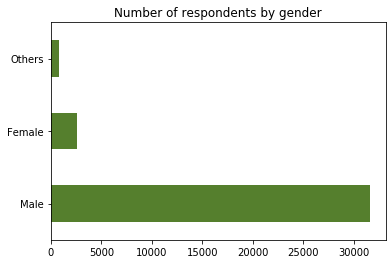

In [25]:
# re-categorise gender field to 'Male', 'Female' and 'Other'
df['Gender'] = np.where(df.Gender == 'Male', 'Male', np.where(df.Gender == 'Female', 'Female', 'Others'))

# Simple distribution of Gender Category
print('Distribution of respondents by gender (raw numbers) \n{}'.format(df['Gender'].value_counts()))
print('Distribution of respondents by gender (percentage) \n{}'.format((df['Gender'].value_counts()/df.shape[0])*100))

(df['Gender'].value_counts()).plot(kind = 'barh', color='#557f2d', title = "Number of respondents by gender")

In [26]:
print("Male survey respondents was {:.2f}".format((sum(df.Gender == 'Male')/df.shape[0])*100))
print("Female survey respondenst was {:.2f}".format((sum(df.Gender == 'Female')/df.shape[0])*100))

Male survey respondents was 90.13
Female survey respondenst was 7.42


#### Gender Distribution by Country

In this part of my project I selected top 18 countries in terms of number of respondents and calculated the gender distribution for each country

In [27]:
#  selecting only countries with at least 1% of all respondents

df_countries = ((df.groupby(['Country'])['Respondent'].count().sort_values(ascending = False)/df.shape[0])>=.01).reset_index()
df_countries = df_countries[df_countries.Respondent == True]

# create a df with only a subset of countries
list_countries = list(df_countries.iloc[:, 0])

subset_df = df[df['Country'].isin(list_countries)]

# print the count by gender
print("Top 18 countries number of respondents by gender\n{}".format(subset_df['Gender'].value_counts()))

Top 18 countries number of respondents by gender
Male      24053
Female     2068
Others      654
Name: Gender, dtype: int64


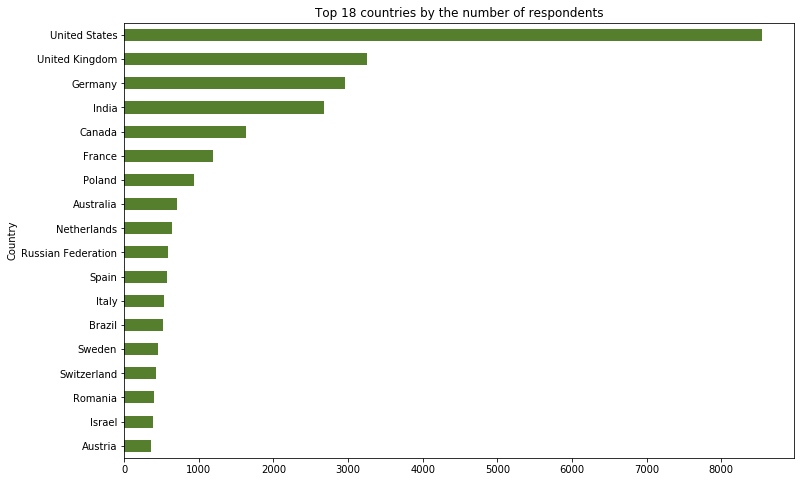

In [28]:
subset_df.groupby(['Country'])['Respondent'].count().sort_values().plot(kind = "barh", figsize = (12,8), color='#557f2d', title = 'Top 18 countries by the number of respondents')

In [29]:
# Country and Gender and proportion of total
groups = subset_df.groupby(['Country', 'Gender'])['Respondent'].count()/subset_df.groupby(['Country'])['Respondent'].count()
groups = groups.reset_index()

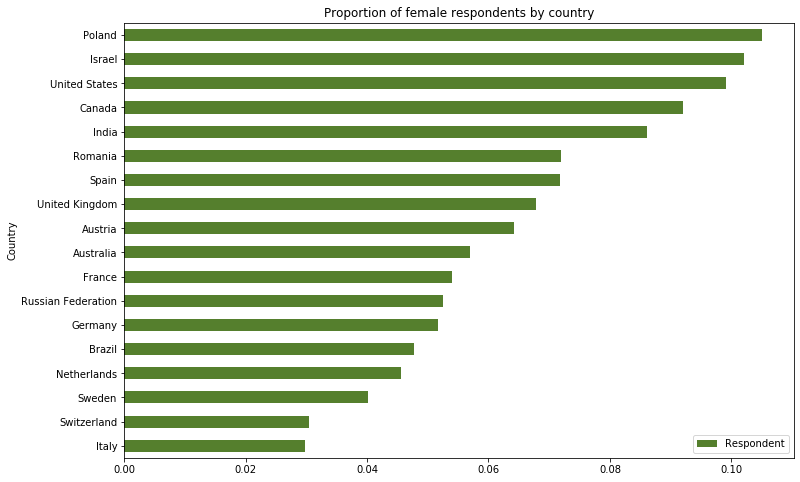

In [30]:
# female respondents as a proportion of all respondents in a country
groups[groups.Gender == 'Female'].sort_values(by = 'Respondent').set_index('Country').plot(kind = 'barh', figsize = (12,8), color='#557f2d', title = "Proportion of female respondents by country")

## 2. Job Satisfaction by gender
## 3. Career Satisfaction by gender
## 4. Salary by gender

In this part question 2, 3 and 4 regarding job and career satisfaction and salary will be ananalysed and the statistical significance t-test is going to be run

In [ ]:
# Visualizations of columns distribution

Mean value: 6.9940375667751065
Median value: 7.0


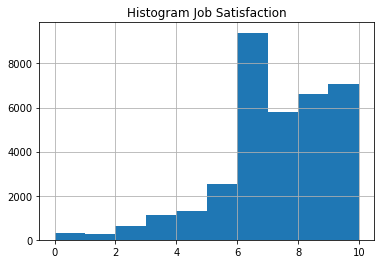

In [75]:
df['JobSatisfaction'].hist()
plt.title ("Histogram Job Satisfaction")
print("Mean value: {}".format(df['JobSatisfaction'].mean()))
print("Median value: {}".format(df['JobSatisfaction'].median()))

Mean value: 7.368548836904476
Median value: 7.368548836904098:


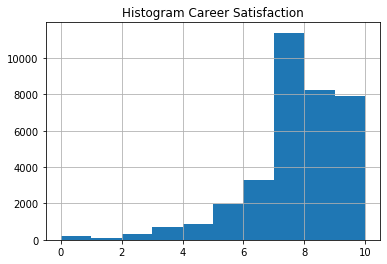

In [77]:
df['CareerSatisfaction'].hist()
plt.title ("Histogram Career Satisfaction")
print("Mean value: {}".format(df['CareerSatisfaction'].mean()))
print("Median value: {}:".format(df['CareerSatisfaction'].median()))

Mean value: 57161.99448411068
Median value: 50872.0930232558


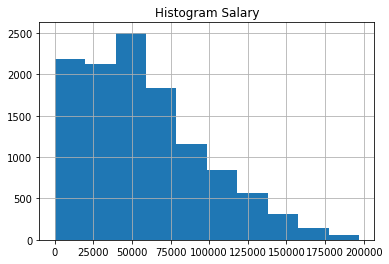

In [79]:
df['Salary'].hist()
plt.title ("Histogram Salary")
print("Mean value: {}".format(df['Salary'].mean()))
print("Median value: {}".format(df['Salary'].median()))

In [31]:
# data preparation
def prepare_df(df, column):
    """Outcome: Selected column in the df has no NaN values"""    
    # Check if the column has less than 30% of NaN values
    # if < 30% then fill numeric columns with the mean => mean will be impacted by the new imputed values but there is 
    # still enough data to argue that it will add meaningful insight for data understanding and data modelling
    #
    # if > 30% then remove rows that are null => columns with the high proportion of NaN values will not be imputed and 
    # the NaN values will be removed. The column data will be not distorted by imputed values.
    
    # used mean values as a fill value as it gives the good approximate of the average value (including 
    # right or left tail values)
    
    
    if sum(df[column].isna())/df.shape[0]<= 0.3:
        df[column].fillna((df[column].mean()), inplace=True)       
    else:
        df = df.dropna(subset = [column], axis = 0)
    return df

# t-test function 
def run_ttest(df, column):
    """Outcome: Selected two values (cat1 and cat2) and compared in the Independent Samples T-Test
    Output: T-test score, and p-value"""
    df = prepare_df(df, column)
    cat1 = df[df['Gender']=='Male']
    cat2 =df[df['Gender']=='Female']

#     print(df.shape)
    return ttest_ind(cat1[column], cat2[column])

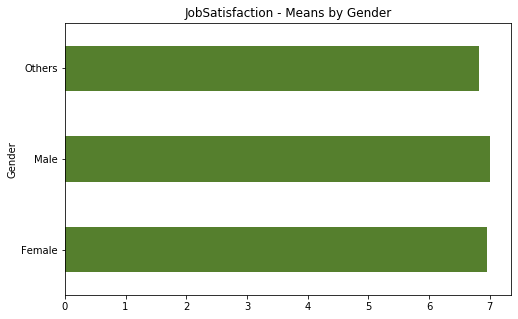

T-test Results: Ttest_indResult(statistic=1.4052392377309995, pvalue=0.15995923669298495)


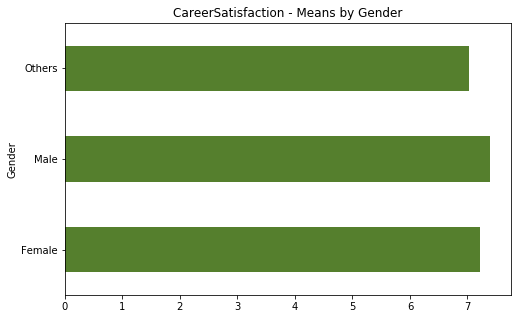

T-test Results: Ttest_indResult(statistic=5.065005553780798, pvalue=4.1050935015467665e-07)


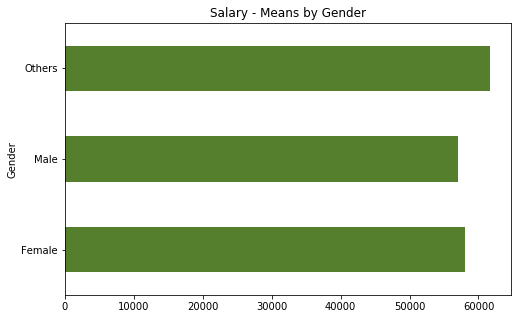

T-test Results: Ttest_indResult(statistic=-0.7564769929054644, pvalue=0.4493787807516285)


In [32]:
list_columns = ['JobSatisfaction', 'CareerSatisfaction', 'Salary']

for column in list_columns:
    df_one_var = prepare_df(df, column)
    df_one_var.groupby('Gender')[column].mean().plot(kind = 'barh', color='#557f2d' , title = column + ' ' + "- Means by Gender", figsize = (8,5))
    plt.show()
    print("T-test Results: {}".format(run_ttest(df_one_var, column)))

#### How many have answered salary questions

In [33]:
df[-df.Salary.isnull()].shape[0]/df.shape[0]

0.3340942163380603

#### How many have answered salary questions by gender

In [34]:
df[-df.Salary.isnull()].groupby(['Gender'])['Respondent'].count()

Gender
Female      819
Male      10666
Others      224
Name: Respondent, dtype: int64

#### Salary respondents by gender distribution

In [35]:
# how many provided salary information
df[-df.Salary.isnull()].groupby(['Gender'])['Respondent'].count()/df[-df.Salary.isnull()].shape[0]

Gender
Female    0.069946
Male      0.910923
Others    0.019131
Name: Respondent, dtype: float64

## 5. Ex-coder responses: Work-life balance question
## 6. Ex-coder responses: Sense of belonging with work colleagues

In this part two last questions 5 and 6 from the ex-coders will be analysed to look at the genders' differences for questions concerning work-life balance and sense of belonging

In [40]:
def return_question_gender_percentage(df, column, title):
    """Outcome: The function returns 3 outputs providing the descriptive data analysis and statistical significance 
    t-test results
    Output:
    1. Summary table with the main data statistics such as: dimension (Gender), Number of respondents, 
    Number of respondents who agreed with the statement, % of respondents who agreed with the statement
    2. Bar chart: % of respondents who agreed with the statement
    3. Independent Samples T-Test result: T-test score, and p-value
    """
    # creating table with raw numbers of gender count in a given column     
    df_gender = df.groupby(['Gender'])[column].count().reset_index()
    
    # creating table with possible answers for the questions by gender   
    df_question = df.groupby(['Gender', column])['Respondent'].count().reset_index()
    
    #  creating flag for 'agree' responses
    df_question[column] = [item.lower() for item in df_question[column]]
    df_question['agree_flag'] = np.where(df_question[column].str.contains ('disagree'), 0, 1  )
    
    #  creating table with gender and flag counts   
    df_question = df_question.groupby(['Gender', 'agree_flag'])['Respondent'].sum().reset_index()
    
    # joining two tables for calculation percentage
    df_joined = df_gender.join(df_question.set_index('Gender'), on = 'Gender', lsuffix= 'df_gender')
    df_joined["Proportion" + column] = (df_joined.Respondent / df_joined[column])*100

    df_joined = df_joined[df_joined.agree_flag == 1]   
    df_joined = df_joined.drop(['agree_flag'], axis = 1)
    df_joined = df_joined.rename(columns = {column : 'Number of Respondents',
                                           'Respondent': 'Agreed',
                                           "Proportion" + column : '% of Total'})
    
    df = df[-df[column].isna()]
    
    #  creating flag for 'agree' responses
    df[column] = [item.lower() for item in df[column]]
    df['agree_flag'] = np.where(df[column].str.contains ('disagree'), 0, 1  )
    
    
    return print(df_joined),  df_joined[["Gender", '% of Total']].set_index('Gender').plot(kind = 'barh', figsize=(8,4), title = title, color='#557f2d'), print("T-test Results for {}: {}".format(column, run_ttest(df, 'agree_flag')))

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     52      31   59.615385
1    Male                    577     377   65.337955
2  Others                     20      13   65.000000
T-test Results for ExCoderReturn: Ttest_indResult(statistic=0.8270371615121609, pvalue=0.40853062924446226)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e6906508>, None)

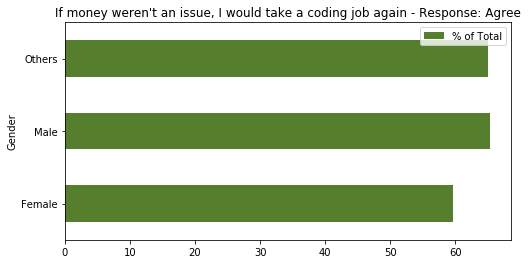

In [41]:
return_question_gender_percentage(df, 'ExCoderReturn', 
                                  "If money weren't an issue, I would take a coding job again - Response: Agree")

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     52      15   28.846154
1    Male                    574     130   22.648084
2  Others                     20       9   45.000000
T-test Results for ExCoderNotForMe: Ttest_indResult(statistic=-1.0136946647413014, pvalue=0.3111213587522601)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e64cdbc8>, None)

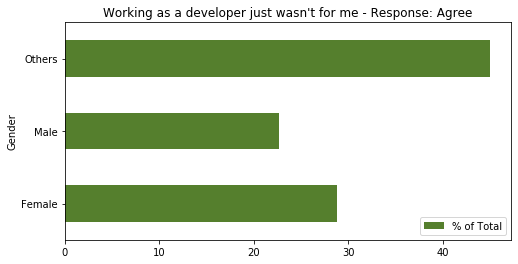

In [42]:
return_question_gender_percentage(df, 'ExCoderNotForMe', 
                                  "Working as a developer just wasn't for me - Response: Agree")

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     51      36   70.588235
1    Male                    576     305   52.951389
2  Others                     20      12   60.000000
T-test Results for ExCoderBalance: Ttest_indResult(statistic=-2.4313148724605553, pvalue=0.015324165786428975)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e69e8908>, None)

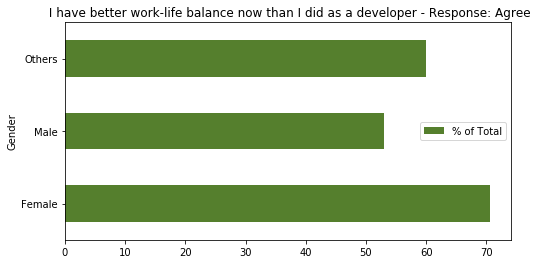

In [43]:
return_question_gender_percentage(df, 'ExCoderBalance', 
                                  ' I have better work-life balance now than I did as a developer - Response: Agree')

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     52      18   34.615385
1    Male                    573     315   54.973822
2  Others                     20       7   35.000000
T-test Results for ExCoder10Years: Ttest_indResult(statistic=2.830932007210688, pvalue=0.004791006353764504)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e68cbb08>, None)

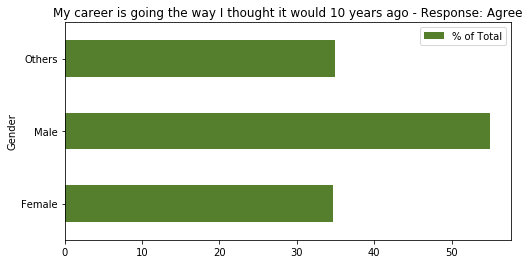

In [44]:
return_question_gender_percentage(df, 'ExCoder10Years', 
                                  'My career is going the way I thought it would 10 years ago - Response: Agree')

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     52      22   42.307692
1    Male                    577     160   27.729636
2  Others                     20      13   65.000000
T-test Results for ExCoderBelonged: Ttest_indResult(statistic=-2.2255748125605495, pvalue=0.026397512649288787)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e637ef08>, None)

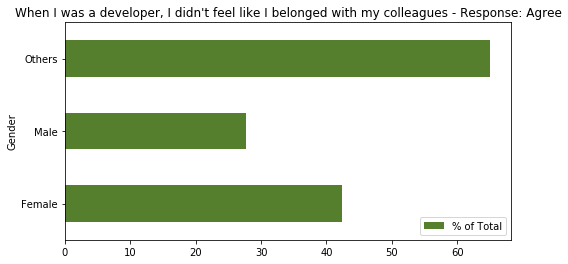

In [45]:
return_question_gender_percentage(df, 'ExCoderBelonged', 
                                  "When I was a developer, I didn't feel like I belonged with my colleagues - Response: Agree")

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     52      42   80.769231
1    Male                    582     374   64.261168
2  Others                     20      11   55.000000
T-test Results for ExCoderSkills: Ttest_indResult(statistic=-2.4083895085613802, pvalue=0.016308324632558106)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e7698a48>, None)

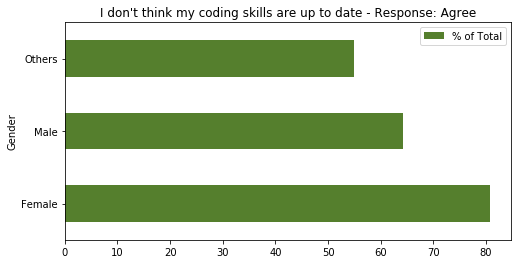

In [46]:
return_question_gender_percentage(df, 'ExCoderSkills', 
                                  "I don't think my coding skills are up to date - Response: Agree")

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     50      24   48.000000
1    Male                    576     228   39.583333
2  Others                     20      12   60.000000
T-test Results for ExCoderWillNotCode: Ttest_indResult(statistic=-1.163491369729425, pvalue=0.24507490094224044)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e646de88>, None)

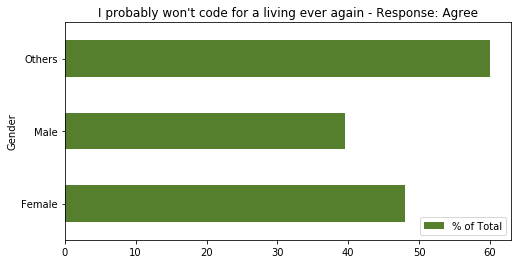

In [47]:
return_question_gender_percentage(df, 'ExCoderWillNotCode', 
                                  "I probably won't code for a living ever again - Response: Agree")

   Gender  Number of Respondents  Agreed  % of Total
0  Female                     52      36   69.230769
1    Male                    584     431   73.801370
2  Others                     20      18   90.000000
T-test Results for ExCoderActive: Ttest_indResult(statistic=0.7141654314478881, pvalue=0.4753877300368814)


(None, <matplotlib.axes._subplots.AxesSubplot at 0x172e75dfec8>, None)

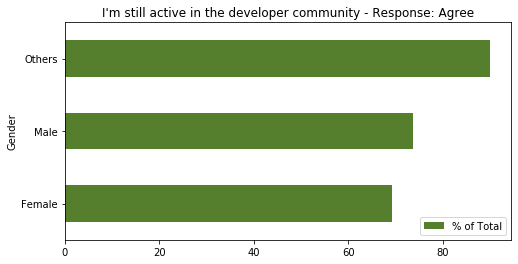

In [48]:
return_question_gender_percentage(df, 'ExCoderActive', 
                                  "I'm still active in the developer community - Response: Agree")

## Evaluate the results

The above findings showed that in terms of job satisfaction and salary there is no statistically significant differences between males and females. However, for career satisfaction, work-life balance and sense of belonging with tech colleagues the differences are significant and it is confirmed by the p-value < 0.05.